In [1]:
from acoular import LoudnessStationary, LoudnessTimevariant, TimeSamples, TimeInOut, MicGeom
from os import path
%matplotlib widget



/Users/sebastianlis/Documents/TU/9. Semester/Python : Akkustik/acoular-1/acoular/h5files.py:5: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/anaconda3/envs/py_akk/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/envs/py_akk/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally re

In [2]:
micgeofile = r"/Users/sebastianlis/Documents/TU/9. Semester/Python : Akkustik/acoular-1/acoular/xml/array_56.xml"
mg = MicGeom(from_file=micgeofile)
print(mg.mpos)
ts = TimeSamples(name=r"/Users/sebastianlis/Documents/example_data.h5")
tio = TimeInOut(source=ts)
ts.sample_freq

[[-0.145527 -0.066774 -0.376879 -0.152297 -0.550855 -0.214634 -0.640968
  -0.244295 -0.6335   -0.236764 -0.529587 -0.193188 -0.345049 -0.120201
  -0.10798  -0.028914  0.145527  0.066774  0.376879  0.152297  0.550855
   0.214634  0.640968  0.244295  0.6335    0.236764  0.529587  0.193188
   0.345049  0.120201  0.10798   0.028914 -0.029598 -0.02879  -0.348561
  -0.082782 -0.463341 -0.088281 -0.306703 -0.042067  0.029598  0.02879
   0.348561  0.082782  0.463341  0.088281  0.306703  0.042067 -0.138631
  -0.268883 -0.241627 -0.072829  0.138631  0.268883  0.241627  0.072829]
 [ 0.6335    0.236764  0.529587  0.193188  0.345049  0.120201  0.10798
   0.028914 -0.145527 -0.066774 -0.376879 -0.152297 -0.550855 -0.214634
  -0.640968 -0.244295 -0.6335   -0.236764 -0.529587 -0.193188 -0.345049
  -0.120201 -0.10798  -0.028914  0.145527  0.066774  0.376879  0.152297
   0.550855  0.214634  0.640968  0.244295  0.463341  0.088281  0.306703
   0.042067 -0.029598 -0.02879  -0.348561 -0.082782 -0.463341 -0.

51200.0

In [3]:
ld_st = LoudnessStationary(source=tio)
#ld_st.overall_loudness.shape

Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
Calculating stationary loudness... depending on the file size, this might take a while


In [4]:
ld_tv = LoudnessTimevariant(source=tio)

Calculating timevariant loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
Calculating timevariant loudness... depending on the file size, this might take a while
Adjusting n_time from 266 to 267


/opt/anaconda3/envs/py_akk/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


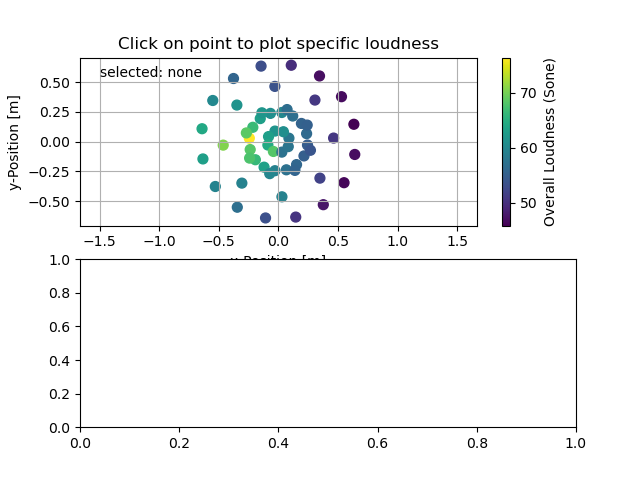

In [5]:
#ld_tv.overall_loudness
ld_st.show(mg)
#from acoular import LoudnessTimevariant
#ld_tv.show(mg)


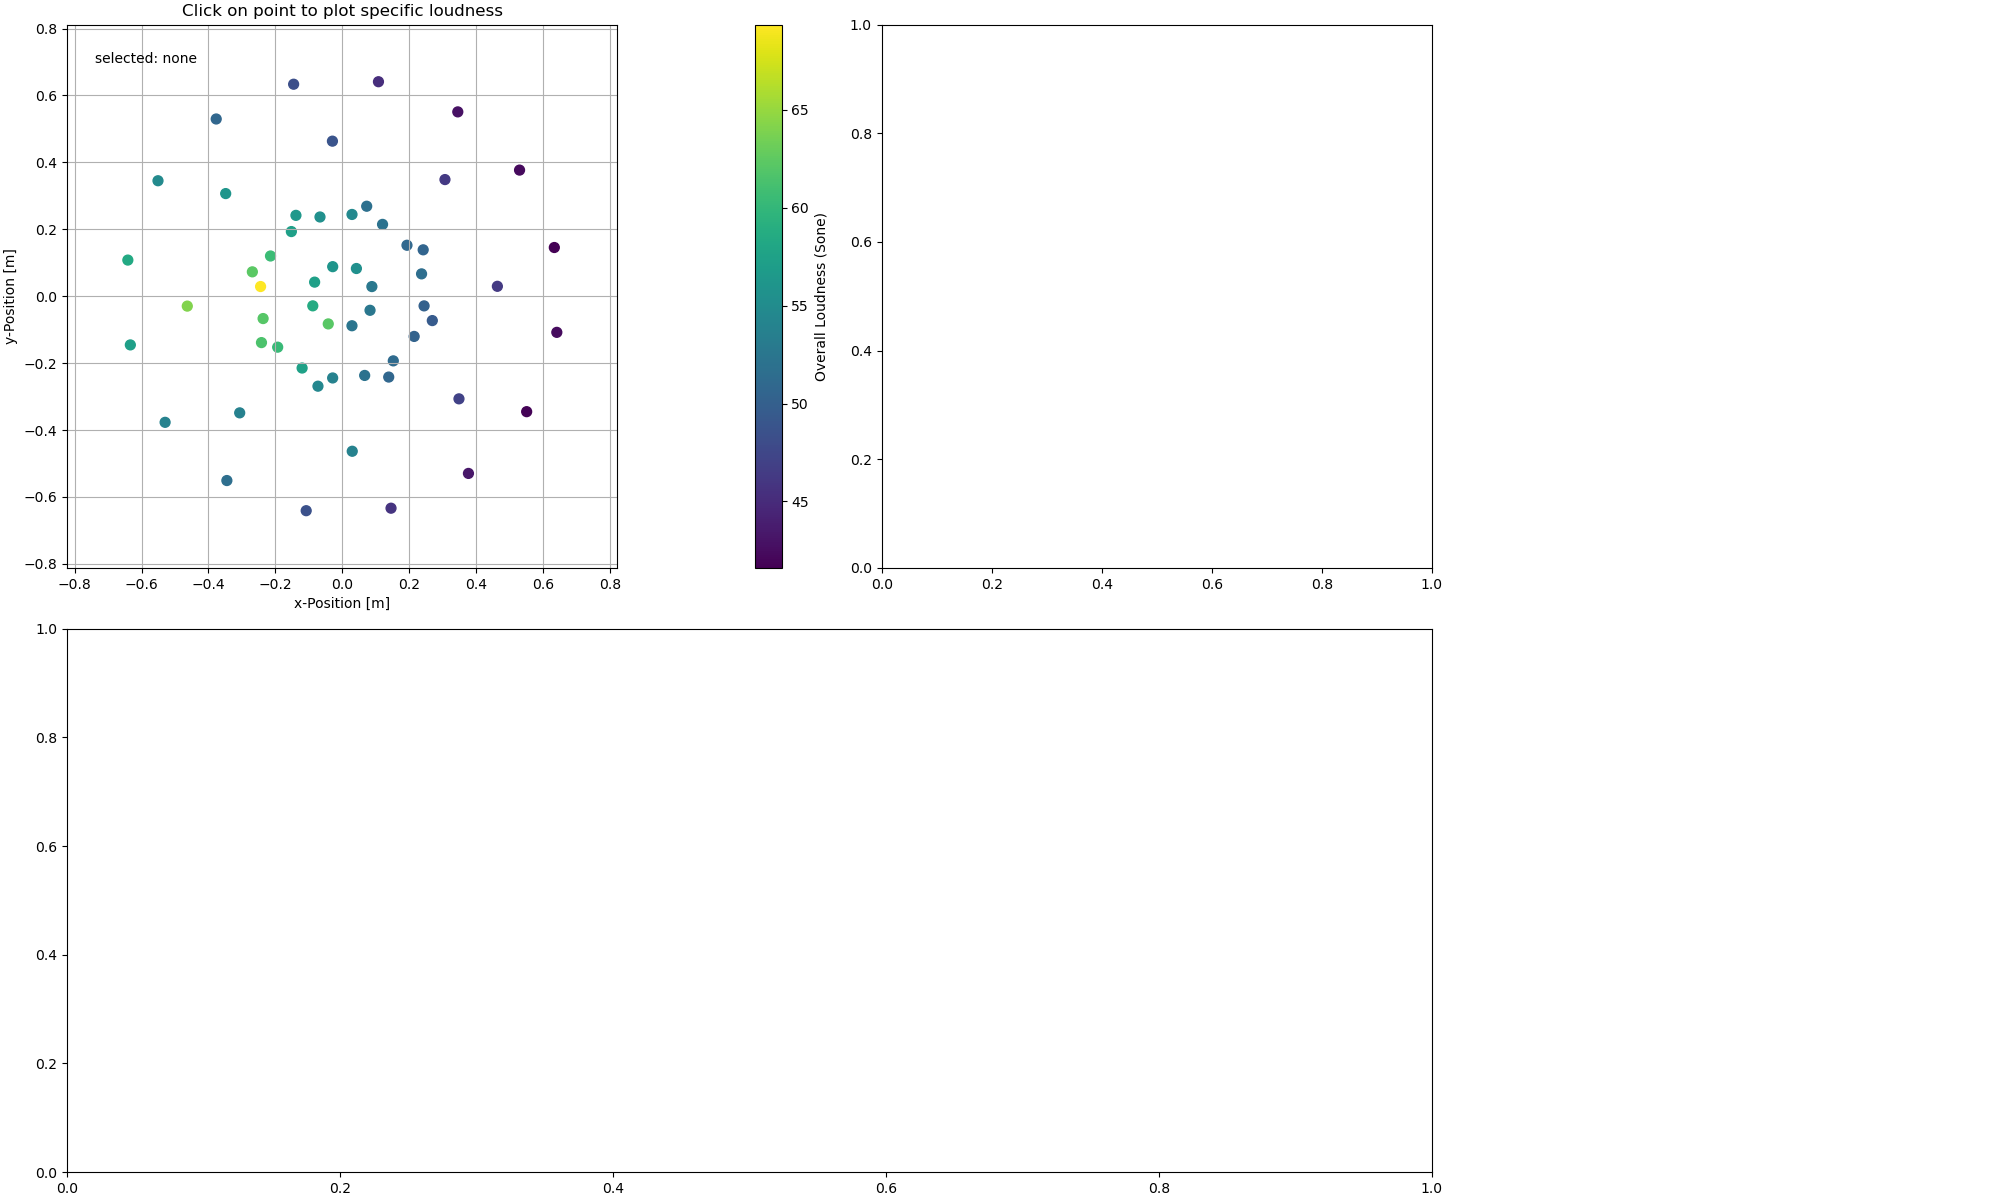

In [6]:
ld_tv.show(mg)